In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import os

In [2]:
df = pd.read_excel('../data/input/ABBREV.xlsx',sheet_name='ABBREV')

In [3]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,50.489,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.0,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.0,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [4]:
df.NDB_No= 'http://idea.rpi.edu/heals/kb/usda#'+df.NDB_No.astype(str).str.rjust(5,'0')

In [5]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,50.489,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.0,1 tbsp,205.0,1 cup,0.0
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.0,1 oz,17.0,1 cubic inch,0.0
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [6]:
len(df)

8618

In [7]:
def scoreEnergy(energy):
  if energy <= 335:
    return 0
  elif energy > 3350:
    return 10
  elif energy > 3015:
    return 9
  elif energy > 2680:
    return 8
  elif energy > 2345:
    return 7
  elif energy > 2010:
    return 6
  elif energy > 1675:
    return 5
  elif energy > 1340:
    return 4
  elif energy > 1005:
    return 3
  elif energy > 670:
    return 2
  elif energy > 335:
    return 1

def scoreSugar(sugar):
  if sugar <= 4.5:
    return 0
  elif sugar > 45:
    return 10
  elif sugar > 40:
    return 9
  elif sugar > 36:
    return 8
  elif sugar > 31:
    return 7
  elif sugar > 27:
    return 6
  elif sugar > 22.5:
    return 5
  elif sugar > 18:
    return 4
  elif sugar > 13.5:
    return 3
  elif sugar > 9:
    return 2
  elif sugar > 4.5:
    return 1

def scoreSaturatedFattyAcid(saturatedFattyAcids):
  if saturatedFattyAcids <= 1:
    return 0
  elif saturatedFattyAcids > 10:
    return 10
  elif saturatedFattyAcids > 9:
    return 9
  elif saturatedFattyAcids > 8:
    return 8
  elif saturatedFattyAcids > 7:
    return 7
  elif saturatedFattyAcids > 6:
    return 6
  elif saturatedFattyAcids > 5:
    return 5
  elif saturatedFattyAcids > 4:
    return 4
  elif saturatedFattyAcids > 3:
    return 3
  elif saturatedFattyAcids > 2:
    return 2
  elif saturatedFattyAcids > 1:
    return 1

def scoreSodium(sodium):
  if sodium <= 90:
    return 0
  elif sodium > 900:
    return 10
  elif sodium > 810:
    return 9
  elif sodium > 720:
    return 8
  elif sodium > 630:
    return 7
  elif sodium > 540:
    return 6
  elif sodium > 450:
    return 5
  elif sodium > 360:
    return 4
  elif sodium > 270:
    return 3
  elif sodium > 180:
    return 2
  elif sodium > 90:
    return 1

def scoreFiber(fibers):
  if fibers <= 0.9:
    return 0
  elif fibers > 4.7:
    return -5
  elif fibers > 3.7:
    return -4
  elif fibers > 2.8:
    return -3
  elif fibers > 1.9:
    return -2
  elif fibers > 0.9:
    return -1

def scoreProtein(proteins):
  if proteins <= 1.6:
    return 0
  elif proteins > 8:
    return -5
  elif proteins > 6.4:
    return -4
  elif proteins > 4.8:
    return -3
  elif proteins > 3.2:
    return -2
  elif proteins > 1.6:
    return -1

def nutriScoreFoods(nutri_score):
  if nutri_score >= -15 and nutri_score <= -1:
    return 'a'
  elif nutri_score >= 0 and nutri_score <= 2:
    return 'b'
  elif nutri_score >= 3 and nutri_score <= 10:
    return 'c'
  elif nutri_score >= 11 and nutri_score <= 18:
    return 'd'
  elif nutri_score >= 19 and nutri_score <= 40:
    return 'e'

In [8]:
def get_nutri_value(row):
    #print (row)
    energy = float(row['Energ_Kcal'])
    sugar = float(row['Sugar_Tot_(g)'])
    fat_sat = float(row['FA_Sat_(g)'])
    sodium = float(row['Sodium_(mg)'])
    fiber = float(row['Fiber_TD_(g)'])
    protein = float(row['Protein_(g)'])
    total = 0
    #print (sugar, type(sugar))
    if not np.isnan(energy):
        total += scoreEnergy(energy*4.184)
    if not np.isnan(sugar):
        total += scoreSugar(sugar)
    if not np.isnan(fat_sat):
        total += scoreSaturatedFattyAcid(fat_sat)
    if not np.isnan(sodium):
        total += scoreSodium(sodium)
    if not np.isnan(fiber):
        total += scoreFiber(fiber)
    if not np.isnan(protein):
        total += scoreProtein(protein)
    return total

In [9]:
df['nutri_values']= df.apply(get_nutri_value, axis='columns')
#df['nutri_values'] = nutri_values

In [10]:
df['nutri_scores']= df['nutri_values'].apply(nutriScoreFoods)
# nutri_scores = []
# for i, row in df.iterrows():
#     nutri_scores.append(nutriScoreFoods(df['nutri_values'].iloc[i]))
# df['nutri_scores'] = nutri_scores

In [11]:
df.sample(5)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,nutri_values,nutri_scores
5358,http://idea.rpi.edu/heals/kb/usda#17281,"LAMB,AUS,IMP,FRSH,COMP OF RTL CUTS,LN&FAT,1/8""...",58.71,256,24.52,16.82,0.98,0.00,NaN,NaN,...,6.711,0.660,87.0,85.0,3 oz,270.00,"1 piece, cooked, excluding refuse (yield from ...",22.0,5,c
251,http://idea.rpi.edu/heals/kb/usda#02021,"GINGER,GROUND",9.94,335,8.98,4.24,5.22,71.62,14.1,3.39,...,0.479,0.929,0.0,1.0,1 tsp,5.20,1 tbsp,0.0,-4,a
4304,http://idea.rpi.edu/heals/kb/usda#14263,"CITRUS FRUIT JUC DRK,FRZ CONC,PREP W/H2O",87.83,46,0.34,0.03,0.38,11.42,0.1,8.13,...,0.002,0.004,0.0,31.0,1 fl oz,248.00,"1 serving, 8 fl oz",0.0,1,b
6086,http://idea.rpi.edu/heals/kb/usda#19103,"CANDIES,FUDGE,VANILLA,PREPARED-FROM-RECIPE",10.85,383,1.05,5.45,0.34,82.15,0.0,79.77,...,1.399,0.227,15.0,28.0,1 oz,NaN,NaN,0.0,17,d
4803,http://idea.rpi.edu/heals/kb/usda#16091,"PEANUTS,SPANISH,RAW",6.39,570,26.15,49.60,2.03,15.83,9.5,NaN,...,22.325,17.238,0.0,146.0,1 cup,28.35,1 oz,0.0,4,c


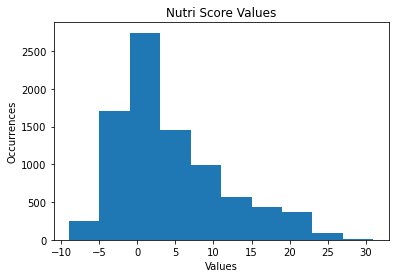

In [12]:
plt.hist(list(df['nutri_values']))
plt.title('Nutri Score Values')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.show()

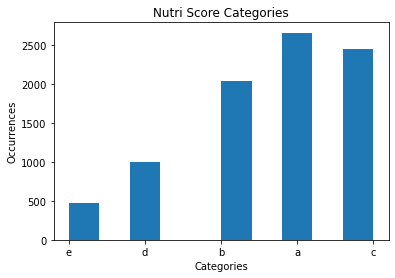

In [13]:
plt.hist(list(df['nutri_scores']))
plt.title('Nutri Score Categories')
plt.xlabel('Categories')
plt.ylabel('Occurrences')
plt.show()

In [14]:
len(df)

8618

In [16]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,nutri_values,nutri_scores
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,25,e
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,25,e
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,28.732,3.694,256.0,12.0,1 tbsp,205.0,1 cup,0.0,20,e
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,7.778,0.800,75.0,28.0,1 oz,17.0,1 cubic inch,0.0,19,e
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0,15,d


In [17]:
df[df['NDB_No'] == 'http://idea.rpi.edu/heals/kb/usda#21089']

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,nutri_values,nutri_scores
6670,http://idea.rpi.edu/heals/kb/usda#21089,"FAST FOODS,CHEESEBURGER; SINGLE,REG PATTY; PLN",38.63,308,16.51,14.72,2.11,28.03,2.0,4.88,...,5.413,1.658,43.0,91.0,1 sandwich,NaN,NaN,0.0,8,c


In [18]:
df[['nutri_scores','nutri_values']].groupby(by='nutri_scores').count()

,nutri_values
nutri_scores,
a,2661
b,2038
c,2446
d,1000
e,473


In [19]:
df[['NDB_No','nutri_scores','nutri_values']].to_csv('../data/usda_nutriscores.csv')